In [8]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [9]:
import pandas as pd

# Load the dataset
train_data = pd.read_csv('train.csv')
train_data.head()

<ipython-input-9-545b16df8e7f>:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('train.csv')


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [10]:
train_data['Date'] = pd.to_datetime(train_data['Date'])
train_data['Weekday'] = train_data['Date'].dt.weekday
train_data['IsWeekend'] = train_data['Weekday'].isin([5, 6])  # Saturday and Sunday

In [11]:
train_data['DaysToHoliday'] = (train_data['Date'] - train_data['Date'].min()).dt.days

In [12]:
train_data['IsStartOfMonth'] = train_data['Date'].dt.day <= 7
train_data['IsMidOfMonth'] = train_data['Date'].dt.day.between(8, 15)
train_data['IsEndOfMonth'] = train_data['Date'].dt.day >= 25


In [13]:
train_data['Month'] = train_data['Date'].dt.month
train_data['Year'] = train_data['Date'].dt.year
train_data['Day'] = train_data['Date'].dt.day

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(train_data[['Customers', 'Sales']])  # Example of scaling numerical features

Import necessary libraries

In [15]:
# Import libraries for preprocessing and model building
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

Define numerical and categorical columns

In [16]:
# Define the numerical and categorical columns
numerical_cols = ['Customers', 'Open', 'Promo', 'SchoolHoliday']
categorical_cols = ['Store', 'DayOfWeek', 'StateHoliday']


Preprocessing for numerical data

In [17]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Fill missing values with mean
    ('scaler', StandardScaler())  # Scale features
])

Preprocessing for categorical data

In [18]:
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Fill missing values with 'missing'
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical features
])

Combine preprocessing for both numerical and categorical data

In [19]:
# Combine preprocessors into a single ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

Create the complete pipeline with preprocessing and model

In [20]:
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))  # RandomForestRegressor model
])

In [21]:
print(train_data.columns)

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'Weekday', 'IsWeekend',
       'DaysToHoliday', 'IsStartOfMonth', 'IsMidOfMonth', 'IsEndOfMonth',
       'Month', 'Year', 'Day'],
      dtype='object')


In [22]:
print(train_data.info())  # Check for missing values and data types
print(train_data.head())  # Preview the first few rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 18 columns):
 #   Column          Non-Null Count    Dtype         
---  ------          --------------    -----         
 0   Store           1017209 non-null  int64         
 1   DayOfWeek       1017209 non-null  int64         
 2   Date            1017209 non-null  datetime64[ns]
 3   Sales           1017209 non-null  int64         
 4   Customers       1017209 non-null  int64         
 5   Open            1017209 non-null  int64         
 6   Promo           1017209 non-null  int64         
 7   StateHoliday    1017209 non-null  object        
 8   SchoolHoliday   1017209 non-null  int64         
 9   Weekday         1017209 non-null  int32         
 10  IsWeekend       1017209 non-null  bool          
 11  DaysToHoliday   1017209 non-null  int64         
 12  IsStartOfMonth  1017209 non-null  bool          
 13  IsMidOfMonth    1017209 non-null  bool          
 14  IsEndOfMonth    10

In [23]:
# Step 1: Split the dataset into training and testing sets
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = train_data.drop(columns=['Sales', 'Date'])  # Drop target and irrelevant columns
y = train_data['Sales']

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
train_data['StateHoliday'] = train_data['StateHoliday'].astype(str)
state_holiday_encoded = pd.get_dummies(train_data['StateHoliday'], prefix='StateHoliday')
train = pd.concat([train_data, state_holiday_encoded], axis=1)
train.drop('StateHoliday', axis=1, inplace=True)


In [25]:
X = train.drop(columns=['Sales', 'Date'])
y = train['Sales']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [30]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2142272.305519397
R^2 Score: 0.8551422116704854


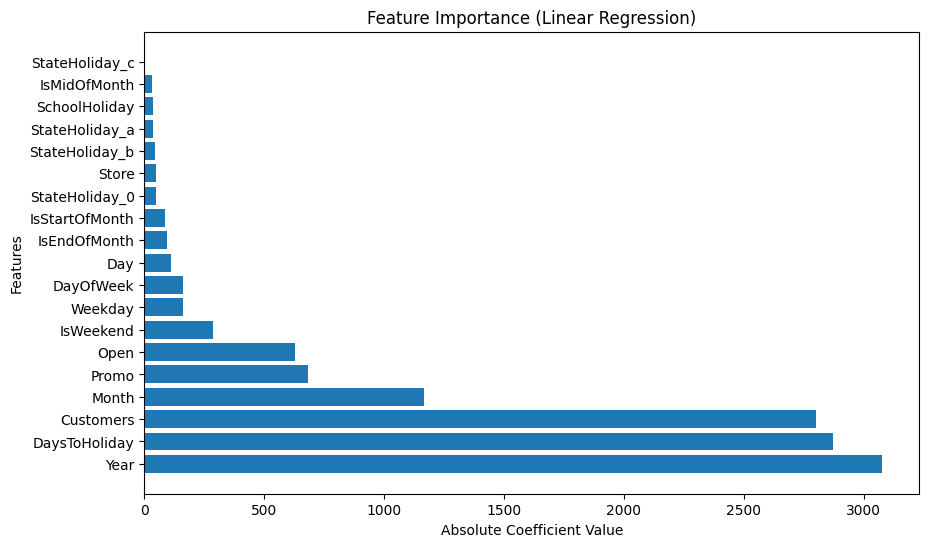

,Feature,Coefficient,AbsCoefficient
13,Year,3078.113334,3078.113334
8,DaysToHoliday,-2870.498722,2870.498722
2,Customers,2802.113062,2802.113062
12,Month,1167.481092,1167.481092
4,Promo,682.989630,682.989630
3,Open,629.477527,629.477527
7,IsWeekend,286.111479,286.111479
6,Weekday,-159.862368,159.862368
1,DayOfWeek,-159.862368,159.862368
14,Day,109.732364,109.732364


In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt  # Import matplotlib.pyplot

# Assuming 'model' and 'X' are already defined
# Get the coefficients of the linear regression model
coefficients = model.coef_

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coefficients
})

# Sort by the absolute value of coefficients
feature_importance['AbsCoefficient'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='AbsCoefficient', ascending=False)

# Plot the feature importance
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['AbsCoefficient'])
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Features')
plt.title('Feature Importance (Linear Regression)')
plt.show()

# Display the feature importance table
feature_importance[['Feature', 'Coefficient', 'AbsCoefficient']]


In [ ]:
import joblib
import datetime
timestamp = datetime.datetime.now().strftime('%Y-%m-%d-%H-%M-%S')
joblib.dump(model, f'model_{timestamp}.pkl')

In [ ]:
# Filter data for a specific store (if needed)
store_data = train_data[train_data['Store'] == 1]

# Ensure the data is sorted by date
store_data = store_data.sort_values('Date')

In [ ]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data):
    result = adfuller(data)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    if result[1] < 0.05:
        print("The time series is stationary")
    else:
        print("The time series is not stationary")

# Check stationarity of the sales data
check_stationarity(store_data['Sales'])

In [ ]:
# Ensure that the data is sorted by Date
train_data = train_data.sort_values('Date')

# Create the 'Sales_diff' column by calculating the difference between consecutive sales
train_data['Sales_diff'] = train_data['Sales'].diff()

# Display the first few rows to confirm the column is created
train_data.head()

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for 'Sales_diff' to check for autocorrelation
plt.figure(figsize=(12, 6))

# Plot Autocorrelation
plt.subplot(121)
plot_acf(train_data['Sales_diff'].dropna(), lags=50, ax=plt.gca())
plt.title('Autocorrelation')

# Plot Partial Autocorrelation
plt.subplot(122)
plot_pacf(train_data['Sales_diff'].dropna(), lags=50, ax=plt.gca())
plt.title('Partial Autocorrelation')

plt.tight_layout()
plt.show()

In [ ]:
# Check if 'Sales_diff' column exists
if 'Sales_diff' in train_data.columns:
    print("Sales_diff column exists.")
else:
    print("Sales_diff column does not exist.")

# Display the first few rows to verify
train_data.head()

In [ ]:
# Check if 'Sales_diff' column exists
if 'Sales_diff' in train_data.columns:
    print("Sales_diff column exists.")
else:
    print("Sales_diff column does not exist.")

# Display the first few rows to verify
train_data.head()

In [37]:
# Create a function to create lag features
def create_lag_features(data, lag=1):
    df = data.copy()
    for i in range(1, lag + 1):
        df[f'Sales_lag_{i}'] = df['Sales'].shift(i)
        df[f'Customers_lag_{i}'] = df['Customers'].shift(i)
        df[f'Promo_lag_{i}'] = df['Promo'].shift(i)
        df[f'SchoolHoliday_lag_{i}'] = df['SchoolHoliday'].shift(i)
        df[f'IsWeekend_lag_{i}'] = df['IsWeekend'].shift(i)
        df[f'DaysToHoliday_lag_{i}'] = df['DaysToHoliday'].shift(i)
        df[f'Month_lag_{i}'] = df['Month'].shift(i)
        df[f'Year_lag_{i}'] = df['Year'].shift(i)

    # Drop rows with NaN values that were created due to shifting
    df = df.dropna()

    return df

# Apply the function to create lag features (let's create lags for the last 3 days)
train_data_lagged = create_lag_features(train_data, lag=3)

# Display the first few rows to verify the new features
train_data_lagged.head()


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Weekday,...,Month_lag_2,Year_lag_2,Sales_lag_3,Customers_lag_3,Promo_lag_3,SchoolHoliday_lag_3,IsWeekend_lag_3,DaysToHoliday_lag_3,Month_lag_3,Year_lag_3
3,4,5,2015-07-31,13995,1498,1,1,0,1,4,...,7.0,2015.0,5263.0,555.0,1.0,1.0,False,941.0,7.0,2015.0
4,5,5,2015-07-31,4822,559,1,1,0,1,4,...,7.0,2015.0,6064.0,625.0,1.0,1.0,False,941.0,7.0,2015.0
5,6,5,2015-07-31,5651,589,1,1,0,1,4,...,7.0,2015.0,8314.0,821.0,1.0,1.0,False,941.0,7.0,2015.0
6,7,5,2015-07-31,15344,1414,1,1,0,1,4,...,7.0,2015.0,13995.0,1498.0,1.0,1.0,False,941.0,7.0,2015.0
7,8,5,2015-07-31,8492,833,1,1,0,1,4,...,7.0,2015.0,4822.0,559.0,1.0,1.0,False,941.0,7.0,2015.0


In [38]:
from sklearn.preprocessing import MinMaxScaler

# Select the columns to scale (exclude 'Date' and 'Sales' as they are not features)
features = ['Sales_lag_1', 'Sales_lag_2', 'Sales_lag_3', 'Customers_lag_1', 'Customers_lag_2', 'Customers_lag_3',
            'Promo_lag_1', 'Promo_lag_2', 'Promo_lag_3', 'SchoolHoliday_lag_1', 'SchoolHoliday_lag_2', 'SchoolHoliday_lag_3',
            'IsWeekend_lag_1', 'IsWeekend_lag_2', 'IsWeekend_lag_3', 'DaysToHoliday_lag_1', 'DaysToHoliday_lag_2', 'DaysToHoliday_lag_3',
            'Month_lag_1', 'Month_lag_2', 'Month_lag_3', 'Year_lag_1', 'Year_lag_2', 'Year_lag_3']

# Initialize the MinMaxScaler
scaler = MinMaxScaler(feature_range=(-1, 1))

# Fit and transform the features
train_data_scaled = train_data_lagged[features]
train_data_scaled[features] = scaler.fit_transform(train_data_scaled[features])

# Display the scaled data
train_data_scaled.head()


<ipython-input-38-b79ce49e9adc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data_scaled[features] = scaler.fit_transform(train_data_scaled[features])


,Sales_lag_1,Sales_lag_2,Sales_lag_3,Customers_lag_1,Customers_lag_2,Customers_lag_3,Promo_lag_1,Promo_lag_2,Promo_lag_3,SchoolHoliday_lag_1,...,IsWeekend_lag_3,DaysToHoliday_lag_1,DaysToHoliday_lag_2,DaysToHoliday_lag_3,Month_lag_1,Month_lag_2,Month_lag_3,Year_lag_1,Year_lag_2,Year_lag_3
3,-0.599817,-0.708118,-0.746673,-0.777748,-0.830807,-0.849756,1.0,1.0,1.0,1.0,...,-1.0,1.0,1.0,1.0,0.090909,0.090909,0.090909,1.0,1.0,1.0
4,-0.326370,-0.599817,-0.708118,-0.594478,-0.777748,-0.830807,1.0,1.0,1.0,1.0,...,-1.0,1.0,1.0,1.0,0.090909,0.090909,0.090909,1.0,1.0,1.0
5,-0.767900,-0.326370,-0.599817,-0.848674,-0.594478,-0.777748,1.0,1.0,1.0,1.0,...,-1.0,1.0,1.0,1.0,0.090909,0.090909,0.090909,1.0,1.0,1.0
6,-0.727997,-0.767900,-0.326370,-0.840552,-0.848674,-0.594478,1.0,1.0,1.0,1.0,...,-1.0,1.0,1.0,1.0,0.090909,0.090909,0.090909,1.0,1.0,1.0
7,-0.261438,-0.727997,-0.767900,-0.617217,-0.840552,-0.848674,1.0,1.0,1.0,1.0,...,-1.0,1.0,1.0,1.0,0.090909,0.090909,0.090909,1.0,1.0,1.0


In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Prepare the data for LSTM
# X will be the lagged features, and y will be the target (Sales for the next day)
X = train_data_scaled[features].values
y = train_data_lagged['Sales'].values

# Reshape X to be 3D as required by LSTM (samples, time steps, features)
X = X.reshape((X.shape[0], 1, X.shape[1]))

# Build the LSTM model
model = Sequential()

# LSTM layer with 50 units
model.add(LSTM(units=50, activation='relu', input_shape=(X.shape[1], X.shape[2])))

# Dropout layer to prevent overfitting
model.add(Dropout(0.2))

# Dense layer to output the prediction
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Summary of the model
model.summary()

# Train the model
history = model.fit(X, y, epochs=10, batch_size=32, validation_split=0.2, verbose=1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 50)                  │          15,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,051 (58.79 KB)

 Trainable params: 15,051 (58.79 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 71s 3ms/step - loss: 22679292.0000 - val_loss: 11475042.0000
Epoch 2/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 85s 3ms/step - loss: 10912615.0000 - val_loss: 7913129.0000
Epoch 3/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 72s 3ms/step - loss: 8666167.0000 - val_loss: 7511704.5000
Epoch 4/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 79s 3ms/step - loss: 8327774.5000 - val_loss: 7334621.5000
Epoch 5/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 68s 3ms/step - loss: 8155447.0000 - val_loss: 7278718.0000
Epoch 6/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - loss: 8045142.0000 - val_loss: 7256588.0000
Epoch 7/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 7952582.0000 - val_loss: 7176542.0000
Epoch 8/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 67s 3ms/step - loss: 7889042.0000 - val_loss: 7127922.0000
Epoch 9/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 81s 3ms/step - loss: 7832118.0000 - val_loss: 7152585.0000
Epoch 10/10
25431/25431 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - loss: 7750

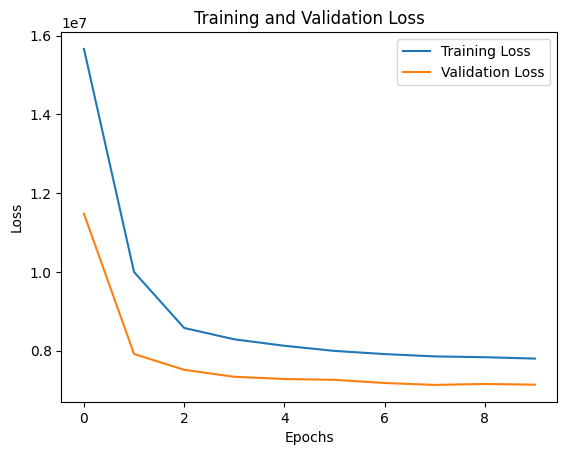

In [40]:
# Plot the training loss
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


31788/31788 ━━━━━━━━━━━━━━━━━━━━ 62s 2ms/step


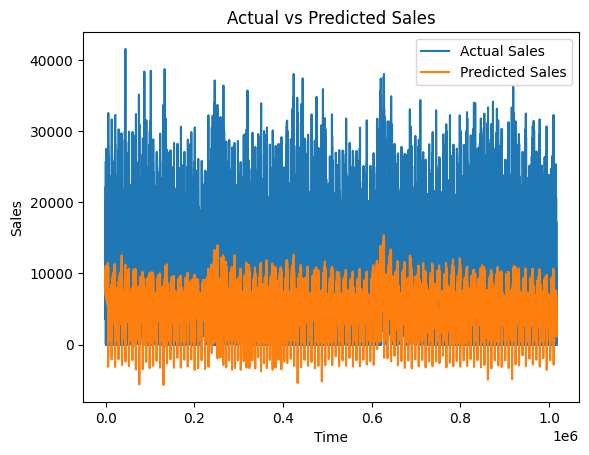

In [41]:
# Make predictions on the training data
predictions = model.predict(X)

# Plot the predicted vs actual sales
plt.plot(y, label='Actual Sales')
plt.plot(predictions, label='Predicted Sales')
plt.xlabel('Time')
plt.ylabel('Sales')
plt.legend()
plt.title('Actual vs Predicted Sales')
plt.show()


In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate MAE and RMSE
mae = mean_absolute_error(y, predictions)
rmse = np.sqrt(mean_squared_error(y, predictions))

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Root Mean Squared Error (RMSE): {rmse}')


Mean Absolute Error (MAE): 1840.2017822265625
Root Mean Squared Error (RMSE): 2688.44313683589


In [43]:
# Save the model
model.save('rossmann_sales_lstm_model.h5')

In [44]:
# Save the model
model.save('my_model.keras')